In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in the data
data = pd.read_csv('/content/uber_nyc_enriched.csv')


In [3]:
data.head(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [4]:
data.shape

(29101, 13)

In [5]:
data.isnull().sum()

,0
pickup_dt,0
borough,3043
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0


In [6]:
# Check the entries with the highest frequency in borough
data['borough'].value_counts()

,count
borough,
Bronx,4343
Brooklyn,4343
EWR,4343
Manhattan,4343
Queens,4343
Staten Island,4343


In [7]:
# fill the missing values in borough with the entery that immediately precides that Nan
data['borough'].fillna(method='ffill', inplace=True)

<ipython-input-7-6606a2669b0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['borough'].fillna(method='ffill', inplace=True)
<ipython-input-7-6606a2669b0a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['borough'].fillna(method='ffill', inplace=True)


In [8]:
data.isnull().sum()

,0
pickup_dt,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    29101 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
import datetime as dt


# Converting the pickup_dt dtype into Datetime
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])

# Adding useful columns
data['pickup_Month'] = data['pickup_dt'].dt.month_name()
data['pickup_Weekday'] = data['pickup_dt'].dt.day_name()
data['pickup_Day'] = data['pickup_dt'].dt.day
data['pickup_Hour'] = data['pickup_dt'].dt.hour
data['pickup_Minute'] = data['pickup_dt'].dt.minute

In [11]:
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,pickup_Month,pickup_Weekday,pickup_Day,pickup_Hour,pickup_Minute
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0


In [12]:
data.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,pickup_Month,pickup_Weekday,pickup_Day,pickup_Hour,pickup_Minute
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,June,Tuesday,30,23,0
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,June,Tuesday,30,23,0
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,June,Tuesday,30,23,0
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,June,Tuesday,30,23,0
29100,2015-06-30 23:00:00,Staten Island,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,June,Tuesday,30,23,0


# Basic Project questions
1. What are the busiest hours/days for Uber trips in NYC?
2. Which boroughs (Manhattan, Brooklyn, etc.) have the highest demand?
3. How does weather (rain, snow) affect Uber demand?
4. Are there seasonal variations in trip frequency?
5. Can we identify popular pickup/drop-off clusters?


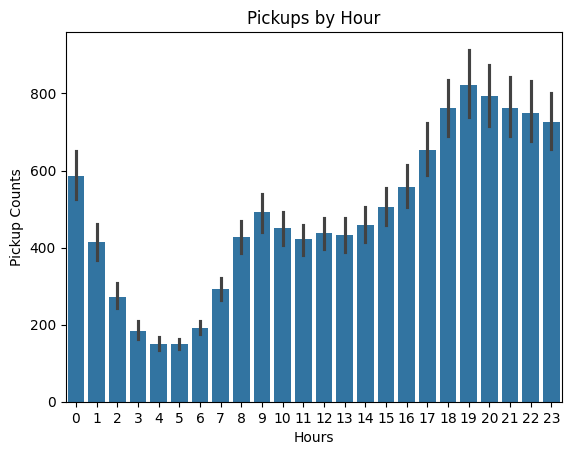

In [20]:
# pickup_hour with the highest pickups in barchart
sns.barplot(x=data['pickup_Hour'], y=data['pickups'])
plt.title('Pickups by Hour')
plt.xlabel('Hours')
plt.ylabel('Pickup Counts')
plt.show()

The busiest hour is the 19th hour with about 800 pickup count

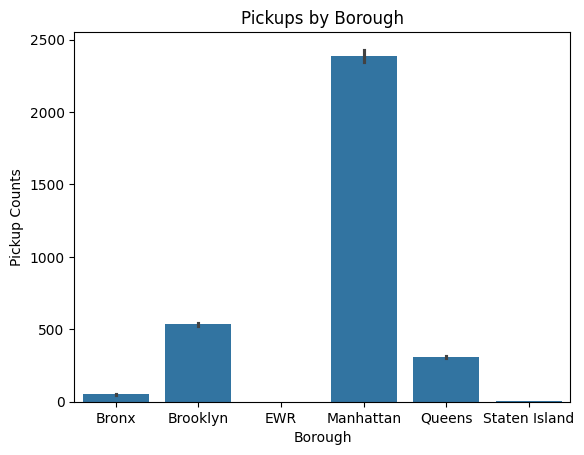

In [27]:
# barplot of borough with highest demand
sns.barplot(x=data['borough'], y=data['pickups'])
plt.title('Pickups by Borough')
plt.xlabel('Borough')
plt.ylabel('Pickup Counts')
plt.show()




Manhattan has the greatest number of pickups of about 2400

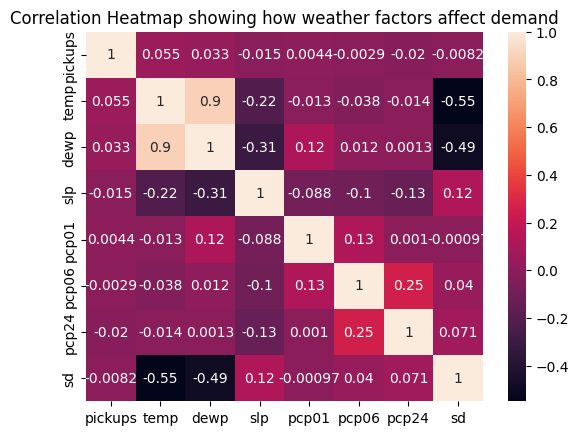

In [28]:
# Heatmap of temp, dewp, slp, 1,6,24 hour liquid precipitate, sd and pickups
sns.heatmap(data[['pickups','temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']].corr(), annot=True)
plt.title('Correlation Heatmap showing how weather factors affect demand')
plt.show()

In [31]:
# Correlation of rain and snow with demand
print('Rain affect demand by: {:.3f} correlation coefficient'.format(data['pcp24'].corr(data['pickups'])))
print('Snow affect demand by: {:.3f} correlation coefficient'.format(data['sd'].corr(data['pickups'])))

Rain affect demand by: -0.020 correlation coefficient
Snow affect demand by: -0.008 correlation coefficient


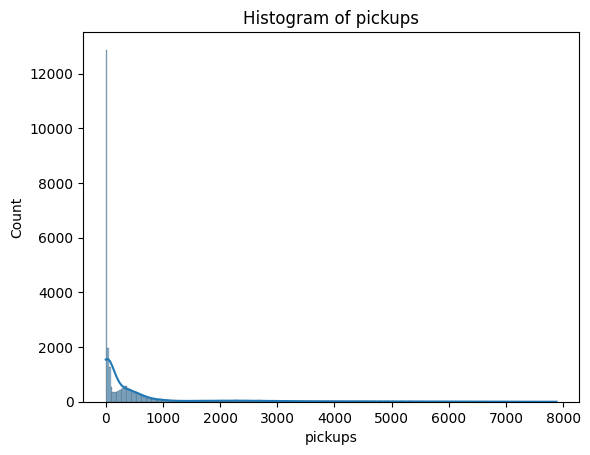

In [32]:
# Histogram of pickups
sns.histplot(data=data, x='pickups', kde=True)
plt.title('Histogram of pickups')
plt.show()

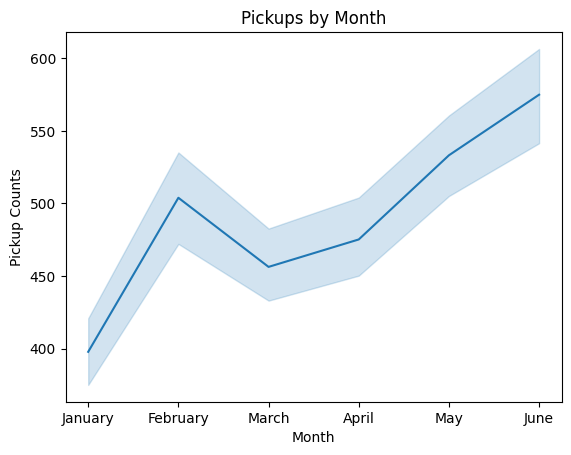

In [33]:
# line plot of pickups by month
sns.lineplot(data=data, x='pickup_Month', y='pickups')
plt.title('Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Pickup Counts')
plt.show()

Oberve that demand increases steadily from 400 in january to 500 in febuary and decreases slightly to about 450 in the month of march. It had been on increase from 450 in the month of march to more than 550 in june

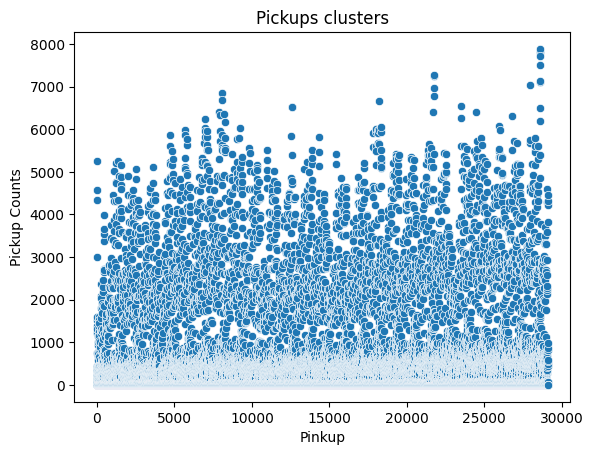

In [36]:
# Scatter plot of pickup
sns.scatterplot(data=data['pickups'])
plt.title('Pickups clusters')
plt.xlabel('Pinkup')
plt.ylabel('Pickup Counts')
plt.show()

From the scatter plot of pickup demands, there is no noticable points of clusters

# Task: Plotting Time series trend


In [37]:
# Create a date column
df = data.copy()
df['Date'] = pd.to_datetime(df['pickup_dt']).dt.date

In [38]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,pickup_Month,pickup_Weekday,pickup_Day,pickup_Hour,pickup_Minute,Date
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0,2015-01-01
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0,2015-01-01
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0,2015-01-01
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0,2015-01-01
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,January,Thursday,1,1,0,2015-01-01


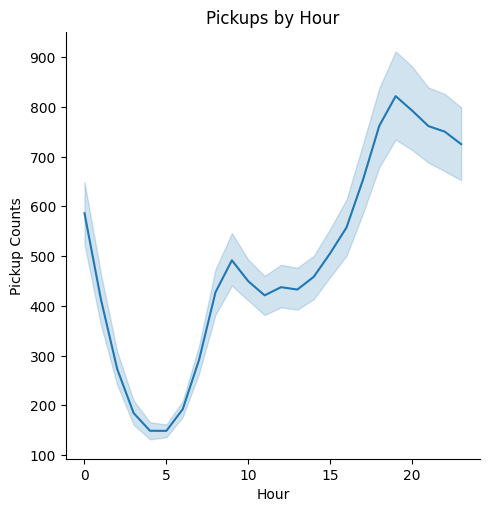

In [39]:
# Hourly time series trend
# line plot of pickups by month
sns.relplot(data=df, x='pickup_Hour', y='pickups', kind='line')
plt.title('Pickups by Hour')
plt.xlabel('Hour')
plt.ylabel('Pickup Counts')
plt.show()

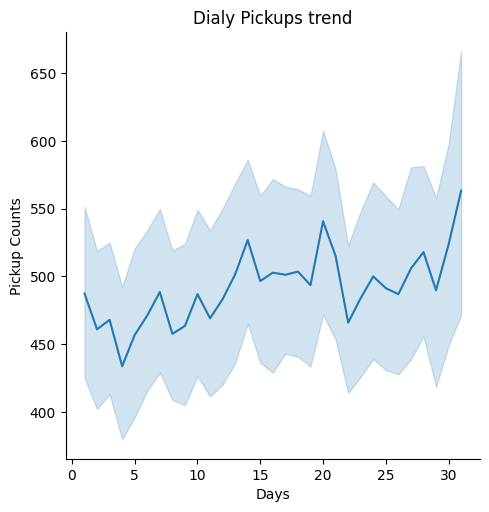

In [40]:
# Dialy time series trend

sns.relplot(data=df, x='pickup_Day', y='pickups', kind='line')
plt.title('Dialy Pickups trend')
plt.xlabel('Days')
plt.ylabel('Pickup Counts')
plt.show()

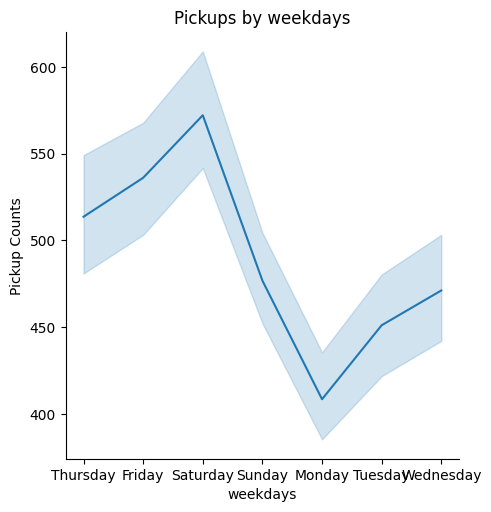

In [42]:
# Weekly time series trend of pickups

sns.relplot(data=df, x='pickup_Weekday', y='pickups', kind='line')
plt.title('Pickups by weekdays')
plt.xlabel('weekdays')
plt.ylabel('Pickup Counts')
plt.show()

In [44]:
# Visualizing pickup hotspot using plotly
import plotly.express as px
import plotly.graph_objects as go
#import plotly.plotly as py

In [45]:
data = [go.Scatter(x=df['pickup_Day'], y=df['pickups'], mode='markers')]
layout = go.Layout(title='Pickups by Day', xaxis=dict(title='Day'), yaxis=dict(title='Pickups'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [46]:
# Create a line plot of pickups using plotly
fig = px.line(df, x='pickup_Day', y='pickups', title='Pickups by Day')
fig.show()